# Приоритизация гипотез и анализ А/В-теста интернет-магазина

# Описание задачи
Отдел маркетинга вместе с командой аналитиков крупного интернет-магазина подготовили список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

# Описание данных 
**Данные для первой части**

Файл hypothesis.csv.
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

Файл orders.csv.
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл visitors.csv. 
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Часть 1. Приоритизация гипотез. 

В файле hypothesis.csv содержится 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort  

### Предобработка данных

In [1]:
# импортируем все необходимые библиотеки
import pandas as pd
import scipy.stats as stats
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import math
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()

In [2]:
# загрузим данные и запишем их в переменную
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Посмотрим на данные

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis.describe()

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [5]:
hypothesis.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

В датафрейме 5 столбцов, тип первого - object, в нем содержится текст, остальные столбцы имеют тип int64 - целые числа, здесь все корректно  
Пропуски и нулевые значения также отсутствуют (минимальное значение = 1)  
Проверим наличие дубликатов, приведем наименования столбцов к нижнему регистру, а также увеличим ширину столбцов, чтобы текст гипотез отображался полностью

In [6]:
# проверим наличие дубликатов
hypothesis.duplicated().sum()

0

In [7]:
# приведем все названия к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()
# увеличим ширину колонок
pd.set_option('max_colwidth', 110) 
hypothesis.head(3)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3


Предобработка завершена, тип данных соответствует нужному, пропуски и дубликаты отсутствуют, наименования столбцов приведены к корректному виду, весь текст отображается

### Фреймворк ICE для приоритизации гипотез
Применим фреймворк ICE для приоритизации гипотез и отсортирем их по убыванию приоритета

In [8]:
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2)

hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


По фреймворку ICE наибольший приоритет получили гипотезы: 
* 8 - Запустить акцию, дающую скидку на товар в день рождения, 
* 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей, 
* 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.  

А наименьший приоритет получили гипотезы: 
* 5 - Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов, 
* 3 - Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар, 
* 4 - Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей.

### Фреймворк RICE для приоритизации гипотез
Применим фреймворк RICE для приоритизации гипотез и отсортируем их по убыванию приоритета

In [9]:
hypothesis['RICE'] = ((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2)

hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По фреймворку RICE наибольший приоритет получили гипотезы: 
* 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, 
* 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа, 
* 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.  

А наименьший приоритет получили гипотезы: 
* 1 - Запустить собственную службу доставки, что сократит срок доставки заказов,
* 5 - Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов, 
* 4 - Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей.

### Вывод по приоритизации гипотез

При применении RICE вместо ICE приоритизация гипотез изменилась:
* гипотеза №8 с первого места сместилась на пятое, а №2 наоборот - с пятого места поднялась на второе,
* гипотезы № 7 и №0 остались в тройке лидеров, но №7 поднялась с третьего места на первое, а №0 - опустилась со второго на третье,
* в тройке гипотез с наименьшим приоритетом также остались №5 и №4, а вместо №3 появилась №1, однако они не сделали каких-то больших скачков.

Приоритезация гипотез изменилась таким образом, поскольку во фреймфорке RICE используется параметр reach, который отображает охват пользователей, и т.к. у гипотезы №8 он равен 1, а у №7 - 10, №7 заняла первое место.

## Часть 2. Анализ A/B-теста 

Был проведен A/B-тест и получены результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.  
Приступим к анализу A/B-теста.  

### Предобработка данных

In [10]:
# загрузим файл и запишем его в переменную
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
orders.duplicated().sum()

0

Пропуски и дубликаты отсутствуют  
Тип данных в столбце data - object, переведем в datetime

In [13]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [14]:
# переименуем столбцы transactionId и visitorId на более короткие и понятные orderId и userId
orders = orders.rename(
    columns={
        'transactionId':'orderId', 
        'visitorId':'userId'
    }
)

In [15]:
# теперь для visitors также загрузим файл и запишем его в переменную
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [17]:
visitors.duplicated().sum()

0

Пропуски и дубликаты также отсутствуют  
Тип данных в столбце data также - object, переведем в datetime

In [18]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [19]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

В выборке из 1197 человек в группе А оказалось 46,5%, а в группе В - 53,5%  
Для корректного А/В-теста нужно, чтобы пользователи были распределены равномерно  
Проверим также, нет ли совпадений пользователей в группах

In [20]:
# соберем отдельно данные по группе А
group_a = orders.loc[orders['group'] == 'A']
# соберем отдельно данные по группе В
group_b = orders.loc[orders['group'] == 'B']
# соберем группы во множества и найдем пересечение в них
set(group_a['userId']) & set(group_b['userId'])

{8300375,
 199603092,
 232979603,
 237748145,
 276558944,
 351125977,
 393266494,
 457167155,
 471551937,
 477780734,
 818047933,
 963407295,
 1230306981,
 1294878855,
 1316129916,
 1333886533,
 1404934699,
 1602967004,
 1614305549,
 1648269707,
 1668030113,
 1738359350,
 1801183820,
 1959144690,
 2038680547,
 2044997962,
 2378935119,
 2458001652,
 2579882178,
 2587333274,
 2600415354,
 2654030115,
 2686716486,
 2712142231,
 2716752286,
 2780786433,
 2927087541,
 2949041841,
 2954449915,
 3062433592,
 3202540741,
 3234906277,
 3656415546,
 3717692402,
 3766097110,
 3803269165,
 3891541246,
 3941795274,
 3951559397,
 3957174400,
 3963646447,
 3972127743,
 3984495233,
 4069496402,
 4120364173,
 4186807279,
 4256040402,
 4266935830}

Видим, что есть пользователи, которые находятся в обеих группах одновременно, чего не должно быть

Т.е. необходимо было сначала провести A/A-тест, в котором можно было выявить, что:
* Количество пользователей в различных группах различается более, чем на 1%;
* 58 пользователей находятся в двух группах одновременно  

И для корректного проведения А/В-теста необходимо было поправить эти моменты

Однако поскольку данные для анализа невозможно пересобрать корректно, продолжим работать в текущем виду с учетом этих пользователей

### Кумулятивная выручка

Для того, чтобы построить график кумулятивной выручки, нужно сначала собрать кумулятивные данные 

In [21]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


Теперь построим график кумулятивной выручки по дням и группам A/B-тестирования

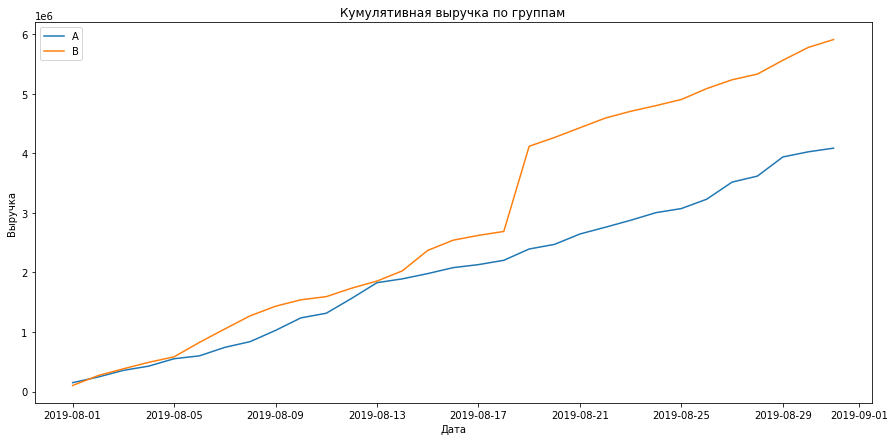

In [22]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,7))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка') 
plt.show()

**Вывод** 

Где-то до середины теста выручка почти равномерно увеличивается, показатели группы В сразу выше, чем в группе А  
Однако в одной точке выручка группы В резко выросла и с тех пор сильно опережает группу А. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Кумулятивный средний чек

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов

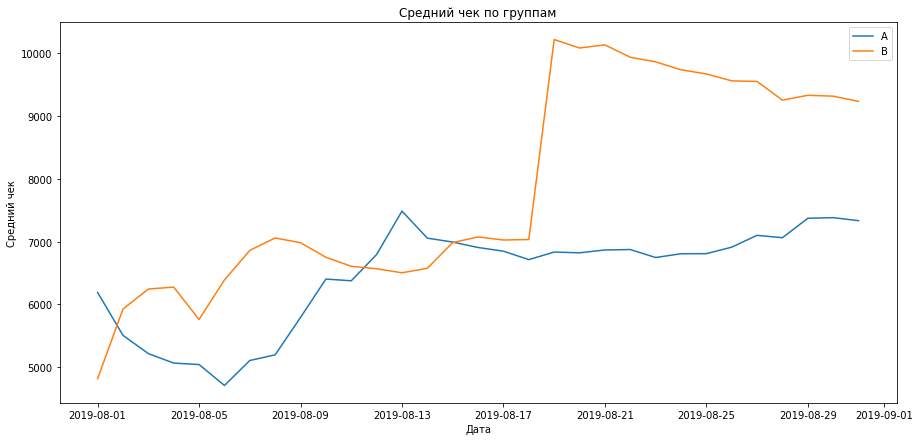

In [23]:
plt.figure(figsize=(15,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('Средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек') 
plt.show()

**Вывод**

Средний чек для группы А падал до 6 августа, затем активно рос до 13 августа и к концу теста практически установился, а для группы В видим большие колебания и большой всплеск в одной точке 19 августа
Скорее всего, в группу B попали крупные заказы, отсюда и всплеск, тогда этой группе нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### Относительное изменение кумулятивного среднего чека группы B к группе A

Построим график относительного различия для среднего чека. Добавим горизонтальную ось на нуле

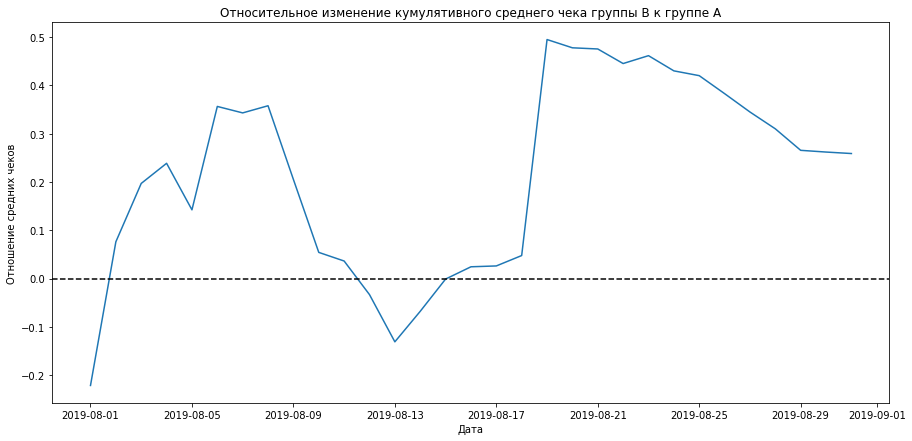

In [24]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение средних чеков') 
plt.show()

**Вывод**

В нескольких точках график различия между сегментами резко «скачет», что подтверждает наличие крупных заказов и выбросов

### Кумулятивное среднее количество заказов на посетителя

Для того, чтобы построить график кумулятивного среднего количества заказов на посетителя по группам

In [25]:
cumulativeData['date'].min()

Timestamp('2019-08-01 00:00:00')

In [26]:
cumulativeData['date'].max()

Timestamp('2019-08-31 00:00:00')

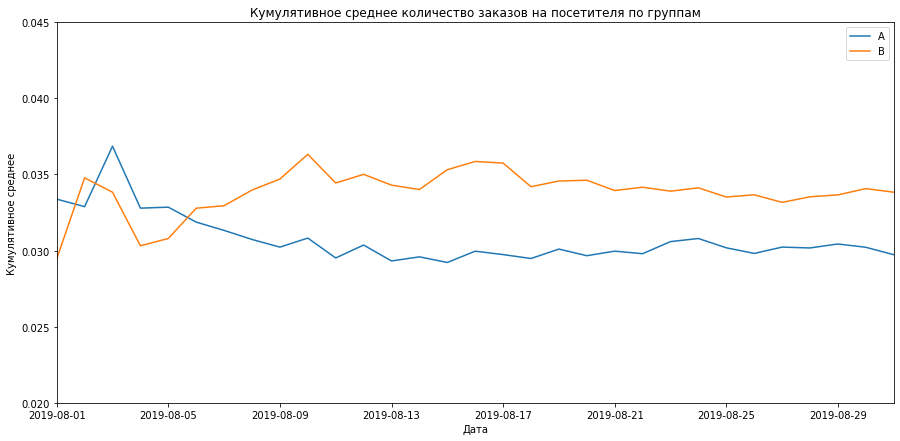

In [27]:
# считаем кумулятивное среднее количество заказов
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее') 

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0.02, 0.045]);

**Вывод**

Группы сначала колебались, 6 августа конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы B просела и также зафиксировалась

### Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

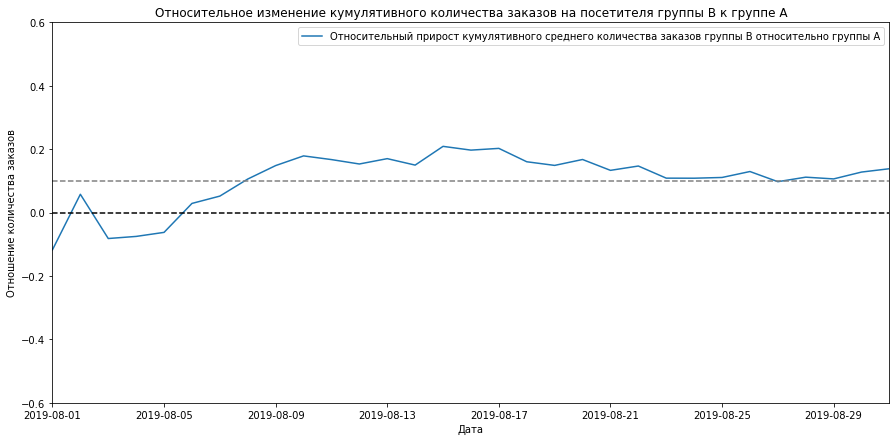

In [28]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.6, 0.6])

plt.title('Относительное изменение кумулятивного количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение количества заказов') 
plt.show()

**Вывод**

В начале теста группа B немного проигрывала группе A, затем вырвалась вперёд и к середине теста прирост составил 20%, и к концу группа В все еще лидирует  
В целом отношение конверсии практически установилось, но сперва стоит проанализировать аномалии

### Количество заказов по пользователям

Подсчитаем количество заказов по пользователям и посмотрим на результат

In [29]:
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(20)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Два пользователя совершили по 11 заказов, по одному - 9 и 8, 6 человек сделали 5 заказов, четверо - по 4, все эти цифры -  необычно много для среднестатистического пользователя  
Построим точечную диаграмму числа заказов на одного пользователя

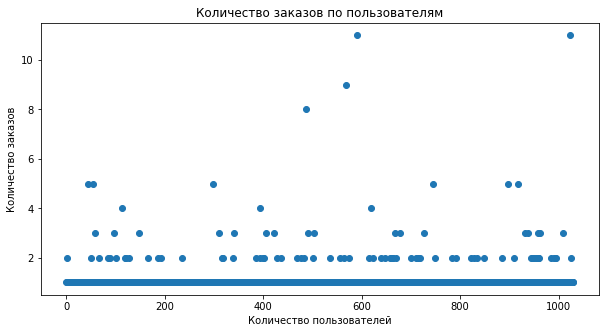

In [30]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(10,5))
plt.scatter(x_values, ordersByUsers['orders'])

plt.title('Количество заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.show()

**Вывод**

Большинство пользователей сделали только 1 заказ  
Пользователей, сделавших 2 заказа гораздо меньше, но все же много, а вот больше 3 заказов мало кто сделал, эти заказы могут считаться аномалиями, для подтверждения этого необходимо посчитать перцентили  


### Граница для определения аномальных пользователей по количеству заказов

Посчитаем выборочные перцентили количества заказов на одного пользователя

In [31]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа и 99% пользователей сделали не более 4 заказов  
Границей для определения аномальных пользователей будем считать по 95 перцентилю, возьмем чуть больше, т.е. **верхняя граница числа заказов - 3**

### Стоимость заказов

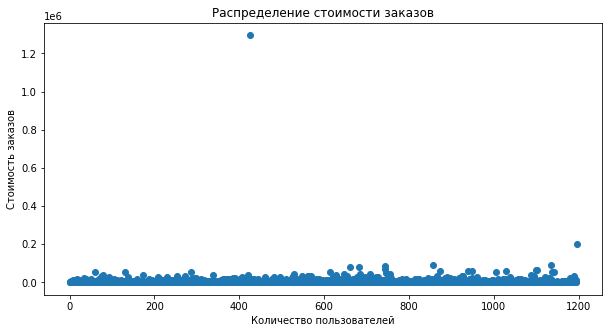

In [32]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue']) 

plt.title('Распределение стоимости заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')

plt.show()

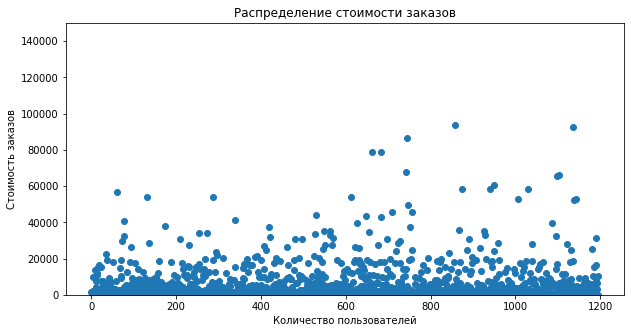

In [33]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue'])
plt.ylim([0, 150000])

plt.title('Распределение стоимости заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')

plt.show()

**Вывод**

По первому графику замечаем, что почти у всех стоимость заказов составляет не более 100 000  
При приближении можем сказать, что в основной массе стоимость заказов не превышает 40 000, и значения где-то с 50 000 можно считать аномальными     
Два самых заметных выброса - на уровне примерно 200 000 и 1 300 000  
Нужно посчитать перцентили, чтобы увидеть более точные показатели

### Граница для определения аномальных заказов по стоимости

Посчитаем выборочные перцентили заказов по стоимости

In [34]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

95% заказов стоили менее 28 000, а заказы дороже 58 233 сосиавляют менее 1%  
Границей для определения аномальных заказов выберем ближе к 99 перцентилю, т.е. **верхняя граница стоимости заказов - 50 000**

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным - до удаления аномалий

Для определения статистической значимости различий в среднем количестве заказов на посетителя и в среднем чеке заказа между группами в этом и всех последующих шагах будем использовать **Непараметрический тест Уилкоксона-Манна-Уитни**, поскольку в имеющихся данных присутствуют выбросы, а данный тест работает с рангами никак не учитывая сами значения, что нам и нужно  

Сформулируем гипотезы  
**Нулевая:** различий в среднем количестве заказов между группами нет  
**Альтернативная:** различия в среднем между группами есть  

Уровень статистической значимости alpha = 0.05

Для начала подготовим данные

In [35]:
# подготовим данные
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Теперь посчитаем статистическую значимость различия в среднем количестве заказов между группами

In [36]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Отноcительный прирост:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


p-value: 0.017
Отноcительный прирост: 0.138


**Вывод**

Первое число — p-value = 0.017 меньше 0.05, значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, **отвергаем**, т.е. по "сырым данным" различия в среднем между группами есть  
Второе число - относительный выигрыш группы B равен **14%**

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Теперь проверим статистическую значимость различий в среднем чеке чеке заказа между группами по «сырым» данным  
**Нулевая гипотеза:** различий в среднем чеке между группами нет   
**Альтернативная гипотеза:** различия в среднем чеке между группами есть  

Уровень статистической значимости alpha = 0.05

In [37]:
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Отноcительный прирост:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
Отноcительный прирост: 0.259


**Вывод**

P-value= 0.729, что значительно больше 0.05, соответственно, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет  
А средний чек группы B на 26% выше среднего чека группы A

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Ранее мы приняли за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 50 000 рублей - так мы уберём 1% до 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами  
Сделаем срезы пользователей с числом заказов больше 3 и пользователей, совершивших заказы дороже 50 000, и объединим их в одной таблице 

In [38]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 50000]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
abnormalUsers.shape[0]

1099    148427295
18      199603092
23      237748145
1137    759473111
949     887908475
Name: userId, dtype: int64

26

Всего 26 аномальных пользователей  
Узнаем, как их действия повлияли на результаты теста - посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным  
Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [39]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [40]:
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Отноcительный прирост:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.011
Отноcительный прирост: 0.158


**Вывод**

Результаты по среднему количеству заказов практически не изменились:  
p-value = 0.011 все еще меньше 0.05, значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем, т.е. и по "очищенным данным" различия в среднем между группами есть  
Относительный выигрыш группы B увеличился на 2% и составил 16%

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Теперь посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным и проверим, изменится ли что-то

In [41]:
print('p-value:', 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Отноcительный прирост:', 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.819
Отноcительный прирост: 0.024


**Вывод**

P-value увеличился на 10% - 0.819, что также как и по "сырым" данным значительно больше 0.05, соответственно, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет  
А средний чек группы B значительно снизился и стал всего на 2,4% (вместо 26%) выше среднего чека группы A

### Вывод по анализу A/B-теста

Повторим, что удалось выяснить по итогам анализа А/В-теста
1. Есть статистически значимое различие по среднему количеству заказов между группами и по «сырым» данным, и по данным после фильтрации аномалий. Относительный прирост среднего количества заказов группы B к среднему количеству заказов группы A увеличился на 2% по "очищенным данным" по сравнению с сырыми;

2. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий, хотя относительный прирост среднего чека группы B к среднему чеку группы A по "очищенным данным" снизился на 23,5% по сравнению с сырыми;

3. График различия среднего количества заказов между группами показывает, что результаты группы B стремятся к стабилизации и обгоняют группу A почти на 20%;

4. График различия среднего чека в нескольких точках «скачет» по причине выбросов - крупных заказов (самый крупный почти на 1,3 млн)

Таким образом, решение по результатам теста - **остановить тест, зафиксировать победу группы В**


## Общий вывод  

В первой части работы была проведена приоритизация гипотез, сформулированных с целью увеличения выручки интернет-магазина  
С учетом фреймворка RICE, который учитывает охват пользователей, самый высокий приоритет получила гипотеза №7: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  

Во второй части был проведен анализ результатов A/B-теста:
* определено статистически значимое различие по среднему количеству заказов между группами
* определено отсутствие статистически значимого различия по среднему чеку между группами
* выявлены аномальные значения количества и стоимости заказов, и проведен анализ без учета выбросов, который не изменил результаты: наличие различия по среднему количеству заказов и отсутствите различия по среднему чеку

По результатам A/B-теста принято решение - остановить тест, зафиксировать победу группы В.